# Безмасштабные сети и модель Барабаши-Альберта

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline
import networkx as nx

###  Степенное распределение

Следующая функция генерирует случайную дискретную величину $X$, имеющую степенное распределение: 
$$
p(x)= C x^{-\gamma},
$$
где $C$- нормировачный коэффициент: $$C=(\gamma-1)x_{min}^{\gamma-1}.$$
Для генарации случайной величины используется [метод обратного преобразования.](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F) 
Функция распределения (cumulative distribution) выражается:
$$
F_{cd}(x)=\mathbb{P}(X\le x)=\sum_{x_{min}}^{x}p(t) \approx 1-\left(\frac{x}{x_{min}} \right )^{-\gamma+1},
$$

In [18]:
def power_law(x_min, gamma):
    r = np.random.random()
    return round(x_min*np.float_power((r), 1/(-gamma+1))) # обратная к F_cd функция

In [19]:
np.random.seed(10)
x=[]
x_min,gam=10,2.5
for i in range(10000):
    x.append(power_law(x_min,gam))

Соответствующее распределение:

Text(0, 0.5, '$\\rho(x)$')

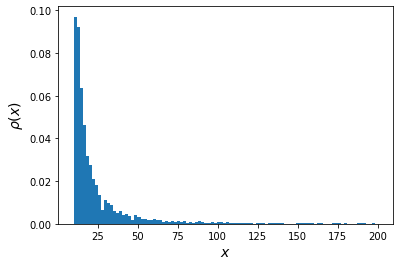

In [20]:
a=plt.hist(x,bins=100,range=[10,200], density=True)
plt.xlabel(r'$ x$', fontsize=14)
plt.ylabel(r'$\rho(x)$', fontsize=14)

Построим распределение в двойном логарифмическом масштабе и попробуем аппроксимировать зависимость прямой:
$$
\log p(x)=\log C- \gamma \log x
$$

Text(0, 0.5, '$\\rho(k)$')

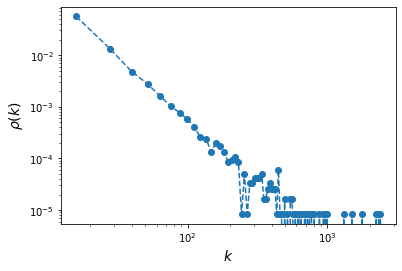

In [21]:
n_bins=200
dens,bin_edges=np.histogram(x,n_bins, density=True)
bins=(bin_edges[:-1]+bin_edges[1:])/2

plt.loglog(bins,dens,'--o')
plt.xlabel(r'$ k$', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

-1.8121063303237919 0.4889148965759237


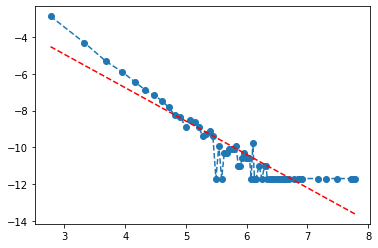

In [22]:
nonzero_dens=dens[np.nonzero(dens)]
nonzero_bins=bins[np.nonzero(dens)]
a=np.polyfit(np.log(nonzero_bins),np.log(nonzero_dens),1)[0]
b=np.polyfit(np.log(nonzero_bins),np.log(nonzero_dens),1)[1]
print(a,b)
plt.plot(np.log(nonzero_bins),np.log(nonzero_dens),'o--')
plt.plot(np.log(nonzero_bins),a*np.log(nonzero_bins)+b,'--',color='r')

Коэффициент $\gamma$ далек от теоретического.... Попробуем не учитывать последние точки:

-2.3199640275037634 3.1059856509721473


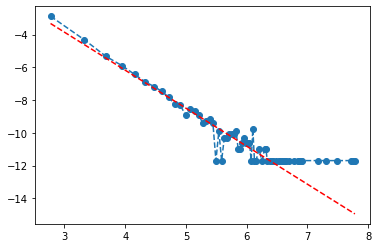

In [23]:
l=15
nonzero_dens=dens[np.nonzero(dens)]
nonzero_bins=bins[np.nonzero(dens)]

coeff=np.polyfit(np.log(nonzero_bins)[:-l],np.log(nonzero_dens)[:-l],1)
print(coeff[0],coeff[1])
plt.plot(np.log(nonzero_bins),np.log(nonzero_dens),'o--')
plt.plot(np.log(nonzero_bins),coeff[0]*np.log(nonzero_bins)+coeff[1],'--',color='r')

### Задача 1.  CCD
Функция распределения $CCD$ (complementary cumulative distribution) определяется как:
$$
F_{ccd}(x)=\sum_{x+1}^{\infty}p(x).
$$  
* напишите функцию, вычисляющую $F_{ccd}$ для заданного массива данных $X$ и числа отрезков $N_{bins}$, разбивающих промежуток $[X_{min},X_{max}]$:


In [44]:
def ccd(x, n_bins):
    ticks = np.linspace(min(x), max(x), num=n_bins)[1:]
    print(ticks[0]==min(x))
    hist = []
    for t in ticks:
        hist.append(sum([_<=t for _ in x]))
    return hist, ticks

* постройте $F_{ccd}$ для случайной величины $x$ (двойная логарифмическая шкала);
* аппроксимируйте распределение прямой, сравните коэффициент с теоретическим.

False


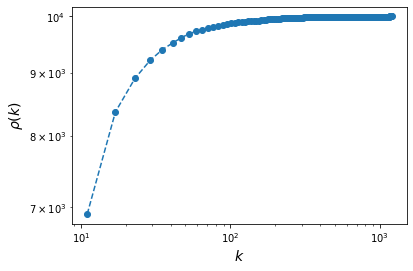

In [45]:
n_bins = 200
dens, bin_edges = ccd(x, n_bins)
bins = bin_edges/2

plt.loglog(bins, dens, '--o')
plt.xlabel(r'$ k$', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)
plt.show()

In [0]:
# ваш код здесь

* используя $F_{ccd}$ оцените коэффициент $\gamma$ распределения степеней связности заданных сетей;
* постройте $F_{ccd}$ и прямую аппроксимации для заданных сетей. Что можно сказать о малых степенях в сети?

In [0]:
G_list=[nx.read_edgelist('bio-diseasome.txt'),
        nx.read_edgelist('bio-celegans.txt'),nx.read_edgelist('cit-HepTh.txt')]


In [0]:
# ваш код здесь

* постройте $F_{ccd}$ и прямую аппроксимации для случайной сети Барабаши-Альберта. Сравните коэффициент наклона прямой с теоретическим значением. 

#### Задача 2. Предпочтительное присоединение
* напишите генератор случайного графа, построенного по принципу нелинейного предпочтительного присоединения:
$$
\Pi(k_i) \sim k_i^{\alpha}
$$
* постройте зависимость степени вершины (например, выберите одну из затравочных) от времени (размера сети) для значений $\alpha=0.5,1.0,2.5$. 

Рекомендуемые параметры: $m=4, t=[10^2,10^3,10^4,...]$.

In [0]:
# ваш код здесь